In [29]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from dnn_app_utils_v2 import *

%matplotlib inline
np.random.seed(1)

In [7]:
train_df = pd.read_csv('data/train.csv')
campaign_df = pd.read_csv('data/campaign_data.csv')

In [8]:
train = pd.merge(train_df, campaign_df, how='left', on=['campaign_id'])

In [9]:
label_encoder = LabelEncoder()
train['communication_type'] = label_encoder.fit_transform(train['communication_type'])
train.head()

,id,user_id,campaign_id,send_date,is_open,is_click,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,42_14051,14051,42,01-09-2017 19:55,0,0,3,88,79,13,4,"September Newsletter\r\n \r\nDear AVians,\r\n ...",[September] Exciting days ahead with DataHack ...,http://r.newsletters.analyticsvidhya.com/7v3rd...
1,52_134438,134438,52,02-11-2017 12:53,0,0,3,67,62,10,4,"November Newsletter\r\n \r\nDear AVians,\r\n \...",[Newsletter] Stage for DataHack Summit 2017 is...,http://r.newsletters.analyticsvidhya.com/7vtb2...
2,33_181789,181789,33,24-07-2017 15:15,0,0,4,7,3,1,1,Fireside Chat with DJ Patil - the master is he...,"[Delhi NCR] Fireside Chat with DJ Patil, Forme...",http://r.newsletters.analyticsvidhya.com/7uvlg...
3,44_231448,231448,44,05-09-2017 11:36,0,0,5,60,56,19,6,"[September Events]\r\n \r\nDear AVians,\r\n \r...","[September] Data Science Hackathons, Meetups a...",http://r.newsletters.analyticsvidhya.com/7veam...
4,29_185580,185580,29,01-07-2017 18:01,0,0,3,67,61,12,3,"Dear AVians,\r\n \r\nWe are shaping up a super...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...


In [10]:
Y = train['is_click'].values
Y.shape
train['is_click'].value_counts()

0    1010409
1      12782
Name: is_click, dtype: int64

In [11]:
X = train[['communication_type','total_links','no_of_internal_links','no_of_images','no_of_sections']]
X.shape

(1023191, 5)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [19]:
X_train.shape

(767393, 5)

In [13]:
train_x = X_train.values.reshape(X_train.shape[0], -1).T
test_x = X_test.values.reshape(X_test.shape[0], -1).T
train_y =y_train.reshape(y_train.shape[0], -1).T
test_y= y_test.reshape(y_test.shape[0], -1).T

In [37]:
train_x.shape

(5, 767393)

In [14]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [15]:

### CONSTANTS ###
layers_dims = [5, 4, 1]

In [16]:
X_train_flatten.shape

NameError: name 'X_train_flatten' is not defined

In [30]:
y_train_flatten.shape

(1, 767393)

In [17]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

NameError: name 'X_train_flatten' is not defined

In [48]:

### CONSTANTS DEFINING THE MODEL ####
n_x = 5     # num_px * num_px * 3
n_h = 2
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [49]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, activation='relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation='relu')
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6863686122508165
Cost after iteration 100: 0.15411620638399137
Cost after iteration 200: 0.14814811319254784
Cost after iteration 300: 0.14238123510543096
Cost after iteration 400: 0.13651778761895944
Cost after iteration 500: 0.13032727315314477
Cost after iteration 600: 0.1236809656404109
Cost after iteration 700: 0.11668698520314084
Cost after iteration 800: 0.10974786155966378
Cost after iteration 900: 0.10340895671971857
Cost after iteration 1000: 0.09809943201726601
Cost after iteration 1100: 0.09397392157612514
Cost after iteration 1200: 0.09093603466992659
Cost after iteration 1300: 0.08876365176561078
Cost after iteration 1400: 0.08722110076717349
Cost after iteration 1500: 0.08611367962004284
Cost after iteration 1600: 0.08529878629450394
Cost after iteration 1700: 0.08467826872040275
Cost after iteration 1800: 0.08418667936834394
Cost after iteration 1900: 0.08378103723370546


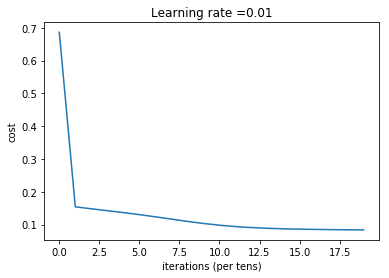

In [50]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y),learning_rate = 0.01, num_iterations = 2000, print_cost=True)

In [25]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.987527902913


In [32]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.987447126248


In [42]:
    train_y[0]

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
predictions_test.shape

(1, 255798)

In [46]:
test_y.shape

(1, 255798)

In [51]:
print(confusion_matrix(test_y[0],predictions_test[0]))
print('classification, roc auc score: %s'
          % roc_auc_score(test_y[0], predictions_test[0]))

[[252587      0]
 [  3211      0]]
classification, roc auc score: 0.5
